In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv("clean_kaggle_data.csv", low_memory=False)
df.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question 1
Perform exploratory data analysis to analyze the survey dataset and to summarize its main characteristics. 
Present 3 graphical figures that represent different trends in the data. For your explanatory data analysis, 
you can consider Country, Age, Education, Professional Experience, and Salary.

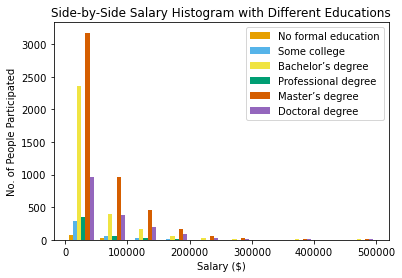

<Figure size 2400x1600 with 0 Axes>

In [21]:
# first graph
# select the two columns
temp = df.filter(items=['Q4', 'Q24'])
temp.columns = ['education', 'salary']

# filter education into different groups, then call the corresponding salary column into a list
x1 = list(temp[temp['education'] == 'No formal education past high school']['salary'])
x2 = list(temp[temp['education'] == 'Some college/university study without earning a bachelor’s degree']['salary'])
x3 = list(temp[temp['education'] == 'Bachelor’s degree']['salary'])
x4 = list(temp[temp['education'] == 'Professional degree']['salary'])
x5 = list(temp[temp['education'] == 'Master’s degree']['salary'])
x6 = list(temp[temp['education'] == 'Doctoral degree']['salary'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00','tab:purple']
names = ['No formal education', 'Some college', 'Bachelor’s degree',
         'Professional degree', 'Master’s degree', 'Doctoral degree']
         
# Plot the histogram with education levels and assign colors and names
plt.hist([x1, x2, x3, x4, x5, x6], bins = int(500000/50000),
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Salary ($)')
plt.ylabel('No. of People Participated')
plt.title('Side-by-Side Salary Histogram with Different Educations')
plt.figure(dpi=400) # needs to comment when doing export
plt.show() # needs to comment when doing export

# export figure for report
# plt.savefig('f1.png',dpi=400, bbox_inches='tight') 

The first histogram examines population distribution across the different salaries with different education levels. To address the effects of education on income level, histograms was plotted with different education levels side by side in order to make the number of people under the same salary category comparable between education levels. In summary, most people participating in this survey have master’s and bachelor’s degrees. Almost all the education levels follow the same trend, a Pareto distribution; no matter which education level it is, more people are located on the left side of the plot meaning lower salary, and the number of people gets less as salary goes higher. However, as salary gets higher, only yellow, orange and purple bars are visible, which shows that there are more people with Bachelor’s, Master’s and Doctoral degree have higher salary compared to other education levels.

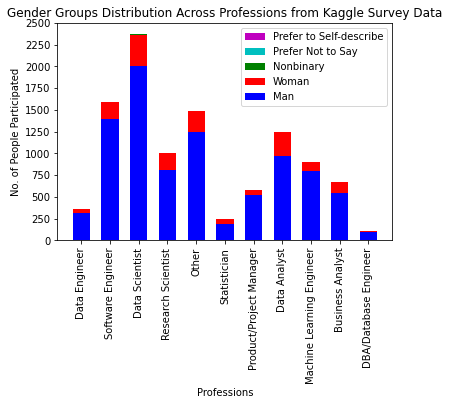

In [38]:
# second graph
# select the two columns
temp = df.filter(items=['Q2', 'Q5'])
temp.columns = ['gender', 'job']

# select different gender groups
man = temp[temp['gender'] == 'Man']
woman = temp[temp['gender'] == 'Woman']
nonb = temp[temp['gender'] == 'Nonbinary']
pnts = temp[temp['gender'] == 'Prefer not to say']
ps = temp[temp['gender'] == 'Prefer to self-describe']

# unique values of jobs
jobs = ['Data Engineer', 'Software Engineer', 'Data Scientist',
       'Research Scientist', 'Other', 'Statistician',
       'Product/Project Manager', 'Data Analyst',
       'Machine Learning Engineer', 'Business Analyst',
       'DBA/Database Engineer']

# count number of gender under each job, store into dataframe and re-order into same sequence
man = man['job'].value_counts()
man = man.to_frame()
man = man.reindex(jobs)

woman = woman['job'].value_counts()
woman = woman.to_frame()
woman = woman.reindex(jobs)

nonb = nonb['job'].value_counts()
nonb = nonb.to_frame()
nonb = nonb.reindex(jobs)

pnts = pnts['job'].value_counts()
pnts = pnts.to_frame()
pnts = pnts.reindex(jobs)

ps = ps['job'].value_counts()
ps = ps.to_frame()
ps = ps.reindex(jobs)

# store the number of people counted
man = man['job']
woman = woman['job']
nonb = nonb['job']
pnts = pnts['job']
ps = ps['job']
ind = [job for job in jobs]
 
# make the stacked bar plot
plt.bar(ind, ps, width=0.6, label='Prefer to Self-describe', color='m', bottom=pnts+nonb+woman+man)
plt.bar(ind, pnts, width=0.6, label='Prefer Not to Say', color='c', bottom=nonb+woman+man)
plt.bar(ind, nonb, width=0.6, label='Nonbinary', color='g', bottom=woman+man)
plt.bar(ind, woman, width=0.6, label='Woman', color='r', bottom=man)
plt.bar(ind, man, width=0.6, label='Man', color='b')

# Plot formatting
plt.xticks(jobs, fontsize=10, rotation=90)
plt.yticks(np.arange(0, 2750, step=250))
plt.ylabel("No. of People Participated")
plt.xlabel("Professions")
plt.legend(loc="upper right")
plt.title("Gender Groups Distribution Across Professions from Kaggle Survey Data")
plt.figure(dpi=400) # needs to comment when doing export
plt.show() # needs to comment when doing export

# export figure for report
# plt.savefig('f2.png', dpi=400, bbox_inches='tight') 

The second stacked bar plot examines the proportion of gender groups under different professions in order to address the first objective (the nature of women’s representation in Data Science and Machine Learning). Although we later only focused on men and women, all the gender groups are plotted in this bar plot to reflect the proportion of women in the total population under each profession. We can see that the number of women coloured in red across all these professions is far less than the number of men including data scientists and machine learning engineers. Data Scientists are the most popular/common professions among all the other professions in this survey.

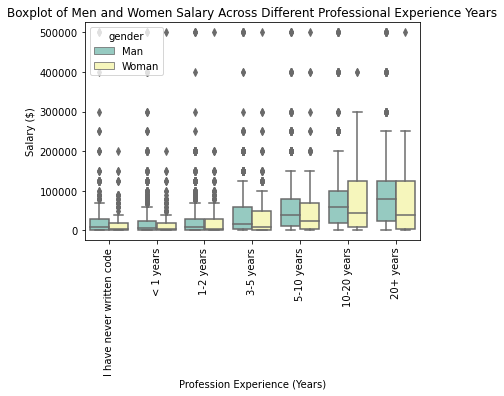

<Figure size 2400x1600 with 0 Axes>

In [50]:
# third graph
# select the three columns; gender, professional experience years and salary
temp = df.filter(items=['Q2', 'Q6','Q24'])
temp.columns = ['gender', 'pe', 'salary']

# only keep men and women's responses
temp = temp.loc[(temp['gender'] == 'Man') | (temp['gender'] == 'Woman')]

# re-arrange the professional experience years order from the shortest to longest years
pe_order = ['I have never written code', '< 1 years', '1-2 years', '3-5 years','5-10 years', '10-20 years', 
        '20+ years']

# Seaborn package boxplot
ax = sns.boxplot(x="pe", y="salary", hue="gender", data=temp, palette="Set3", order = pe_order)

# Plot formatting
ax.set_title('Boxplot of Men and Women Salary Across Different Professional Experience Years')
ax.set_ylabel('Salary ($)')
ax.set_xlabel('Profession Experience (Years)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.figure(dpi=400) # needs to comment when doing export
plt.show() # needs to comment when doing export

# export figure for report
# plt.savefig('f3.png', dpi=400, bbox_inches='tight') 

The third boxplot examines the salaries with different professional experience durations between men and women in order to further explore women’s representation in Data Science and Machine Learning. In general, we can see that as professional experience duration increases, the median salaries also increase, which seems reasonable that more experienced workers receive higher salaries. However, women’s median salaries are always lower than men’s median salaries in all professional experience durations. Interestingly, after 10 years of experience, women’s maximum salaries become greater than men. Men’s and women’s maximum salaries become equal after 20 years of professional experience.

### Question 2
Estimating the difference between average salary (Q24) of men vs. women (Q2).

#### a) Compute and report descriptive statistics for each group (remove missing data, if necessary).

In [15]:
temp = df.filter(items=['Q2', 'Q24'])
temp.columns = ['gender', 'salary']
temp = temp.loc[(temp['gender'] == 'Man') | (temp['gender'] == 'Woman')]
# temp.head()

# isnull returns True or False, then using "sum" function to check total missing values, 
# if it equals 0 meaning no missing values
temp.isnull().sum() 

gender    0
salary    0
dtype: int64

In [16]:
# Descriptive Table 2.1
temp.groupby('gender').salary.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Man,8872.0,50750.619928,70347.974812,1000.0,3000.0,25000.0,70000.0,500000.0
Woman,1683.0,36417.112299,59442.716093,1000.0,1000.0,7500.0,50000.0,500000.0


Based on the descriptive table 2.1, there are 8872 men and 1683 women participated in this survey. The mean of women’s salaries is about 36417.11 dollars with SD = 59442.72, and the mean of men’s salaries is about 50750.62 dollars with SD = 70347.97. 

The maximum salaries of men and women are the same, which are 500000 dollars. 

The minimum salaries are also same between women and men, which are 1000 dollars. 

Men’s salary is generally higher than women’s salary in most of the quartiles.

#### b) If suitable, perform a two-sample t-test with a 0.05 threshold. Explain your rationale.

In [17]:
man = temp[temp['gender'] == 'Man']
woman = temp[temp['gender'] == 'Woman']
woman = woman['salary']
man = man['salary']
tc, pc = stats.ttest_ind(woman, man)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = -7.84433  p = 4.77315e-15


According to the central limit theorem, we assume homogeneity of variance in our data due to a large number of participants (n > 30). Based on the results, we can conclude that there is a significant difference between men’s and women's salary incoming, since p-value = 5e-15 < 0.05. Based on the t-value, we can also conclude that men tend to earn more than women do.

#### c) Boostrap your data from comparing the mean of salary (Q24) for the two groups. Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot two bootstrapped distributions (for men and women) and the distribution of the difference in means.

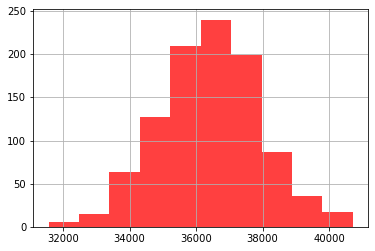

In [18]:
# Figure 2.1
# bootstrap woman's mean
np.random.seed(seed=200) # keep the result consistent
k = int(0.95*len(woman)) # pick the sample size to be 95% of the total size
Replications_w = np.array([np.random.choice(woman, k, replace = True) for _ in range(1000)])
Mean_w = np.mean(Replications_w, axis=1)

# plot histogram
plt.hist(Mean_w, 10, facecolor='r', alpha=0.75)
plt.grid(True)
plt.show()

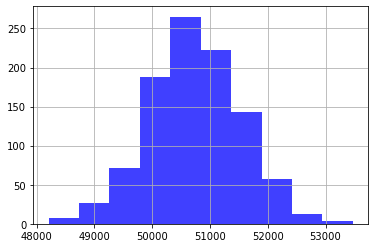

In [19]:
# Figure 2.2
# bootstrap man's mean
np.random.seed(seed=200) # keep the result consistent
k = int(0.95*len(man)) # pick the sample size to be 95% of the total size
Replications_m = np.array([np.random.choice(man, k, replace = True) for _ in range(1000)])
Mean_m = np.mean(Replications_m, axis=1)

# plot histogram
plt.hist(Mean_m, 10, facecolor='b', alpha=0.75)
plt.grid(True)
plt.show()

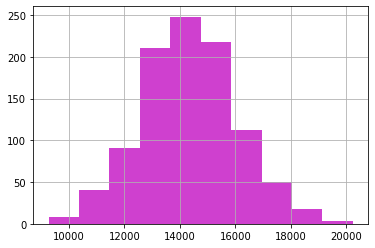

In [20]:
# Figure 2.3
# distribution of the difference in means
d = Mean_m - Mean_w # subtract men's bootstrapped means with women's bootstrapped means

# plot histogram
plt.hist(d, 10, facecolor='m', alpha=0.75)
plt.grid(True)
plt.show()

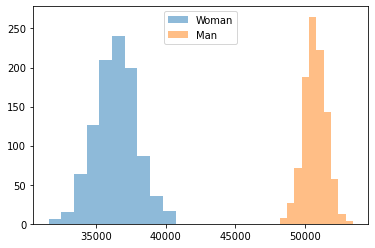

In [21]:
# just for exploration, plot the two bootstrapped distributions in one graph
plt.hist(Mean_w, 10, alpha=0.5, label='Woman')
plt.hist(Mean_m, 10, alpha=0.5, label='Man')
plt.legend(loc='upper center')
# The exploration plot of women and men's salary altogether in one graph
# men's salary is more concentrated and closer to the mean
# and women's salary seems to have a larger variation.

#### d) If suitable, perform a two-sample t-test with a 0.05 threshold on the bootstrapped data. Explain your rationale.

In [22]:
tc, pc = stats.ttest_ind(Mean_m, Mean_w)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = 265.21  p = 0


In [23]:
pc < 0.05

True

Based on the results, the t statistic gets extremely large leading to the p-value becomes extremely small (< 0.05), which indicates a significant difference between the two groups. This is due to the bootstrapped means from each group are all very close to their original sample mean and far away from another group.

#### e) Comment on your findings.

When we used the t-test on the original men’s and women's salary sample means, there already existed a significant difference. The bootstrapped data makes an even larger difference between men and women's salary because men's bootstrapped data/means are very similar to each other and far away from women's bootstrapped means (same as the women’s data). Men's salary is generally $14000 higher than women based on the plot of the differences in means.

### Question 3
[5pts] Select “highest level of formal education” (Q4) from the dataset and repeat steps a to e, this time use analysis of variance (ANOVA) instead of t-test for hypothesis testing to compare the means of salary for three groups (Bachelor’s degree, Doctoral degree, and Master’s degree) [0.75pts for a; 0.5 pts for b; 2pts for c; 0.75 pts for d; 1pt for e].

#### a) Compute and report descriptive statistics for each group (remove missing data, if necessary).

In [4]:
temp = df.filter(items=['Q4', 'Q24'])
temp.columns = ['education', 'salary']
temp = temp.loc[(temp['education'] == 'Bachelor’s degree') 
                | (temp['education'] == 'Master’s degree') 
                | (temp['education'] == 'Doctoral degree')]
# temp.head()

# check missing values, if it equals 0 meaning no missing values
temp.isnull().sum()

education    0
salary       0
dtype: int64

In [5]:
# Descriptive Table 3.1
temp.groupby('education').salary.describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor’s degree,3013.0,35732.824427,60247.753546,1000.0,1000.0,10000.0,50000.0,500000.0
Doctoral degree,1718.0,68719.441211,85403.650394,1000.0,5000.0,40000.0,90000.0,500000.0
Master’s degree,4879.0,52120.106579,67681.571528,1000.0,4000.0,25000.0,70000.0,500000.0


Based on the descriptive table 3.1, there are 3013 bachelor’s, 4879 master’s and 1718 doctoral in this survey. The means of bachelor’s, master’s and doctoral salaries are about 35732.82 with SD = 60247.75, 52120.11 with SD = 67681.57, and 68719.44 with SD = 85403.65. 

The maximum salaries (500000 dollars) are all the same between three levels.

The minimum salaries are also the same among women and men (1000 dollars). 

Doctoral salary is generally higher than the other two across most quartiles.

#### b) If suitable, perform ANOVA with a 0.05 threshold to compare the means of salary for three groups (Bachelor’s degree, Doctoral degree, and Master’s degree). Explain your rationale.

In [6]:
stats.f_oneway(temp[temp['education'] == 'Bachelor’s degree']['salary'],
               temp[temp['education'] == 'Master’s degree']['salary'],
               temp[temp['education'] == 'Doctoral degree']['salary'])

F_onewayResult(statistic=129.7560112960932, pvalue=2.4852074227874282e-56)

In [11]:
tukey = pairwise_tukeyhsd(endog= temp['salary'],
                          groups= temp['education'],
                          alpha=0.05)
print(tukey)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
      group1           group2       meandiff  p-adj   lower       upper    reject
---------------------------------------------------------------------------------
Bachelor’s degree Doctoral degree  32986.6168 0.001 28093.5374  37879.6962   True
Bachelor’s degree Master’s degree  16387.2822 0.001 12637.1593   20137.405   True
  Doctoral degree Master’s degree -16599.3346 0.001 -21139.934 -12058.7353   True
---------------------------------------------------------------------------------


We also assume homogeneity of variance in our data because of CLT (n > 30). Based on the results, we can conclude significant differences in salaries between the three groups, since p-value = 5e-56 < 0.05. From the Tukey test, all three comparisons are significant. The largest difference is between Bachelor's and Doctoral, which is 32986.62.

#### c) Boostrap your data from comparing the mean of salary (Q24) for the three groups. Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot three bootstrapped distributions and the distribution of the difference in means.

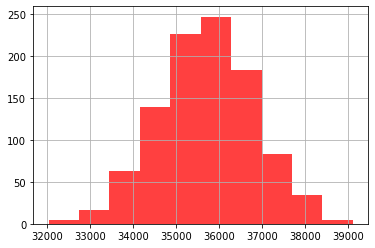

In [13]:
# Figure 3.1
# set up
b = temp[temp['education'] == 'Bachelor’s degree']['salary']

# boostrap bachelor's mean
np.random.seed(seed=432) # keep the result consistent
k = int(0.95*len(b)) # pick the sample size to be 95% of the total size
Replications_b = np.array([np.random.choice(b, k, replace = True) for _ in range(1000)])
Mean_b = np.mean(Replications_b, axis=1)
plt.hist(Mean_b, 10, facecolor='r', alpha=0.75)
plt.grid(True)
plt.show()

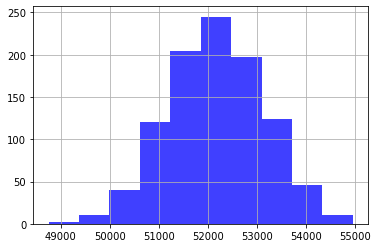

In [14]:
# Figure 3.2
# set up
m = temp[temp['education'] == 'Master’s degree']['salary']

# boostrap master's mean
np.random.seed(seed=432) # keep the result consistent
k = int(0.95*len(m)) # pick the sample size to be 95% of the total size
Replications_m = np.array([np.random.choice(m, k, replace = True) for _ in range(1000)])
Mean_m = np.mean(Replications_m, axis=1)
plt.hist(Mean_m, 10, facecolor='b', alpha=0.75)
plt.grid(True)
plt.show()

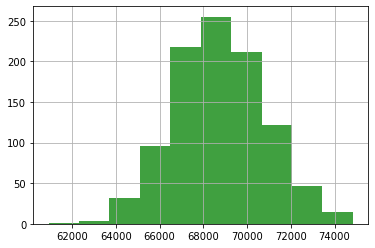

In [15]:
# Figure 3.3
# set up
d = temp[temp['education'] == 'Doctoral degree']['salary']

# boostrap doctoral's mean
np.random.seed(seed=432) # keep the result consistent
k = int(0.95*len(d)) # pick the sample size to be 95% of the total size
Replications_d = np.array([np.random.choice(d, k, replace = True) for _ in range(1000)])
Mean_d = np.mean(Replications_d, axis=1)
plt.hist(Mean_d, 10, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

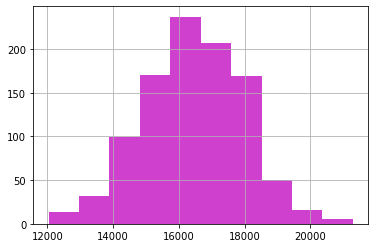

In [16]:
# Figure 3.4
# distribution of the difference in means between bachelor's and master's
d1 = Mean_m - Mean_b
plt.hist(d1, 10, facecolor='m', alpha=0.75)
plt.grid(True)
plt.show()

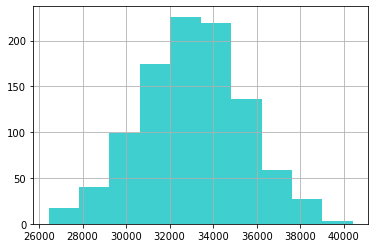

In [17]:
# Figure 3.5
# distribution of the difference in means between bachelor's and doctoral's
d2 = Mean_d - Mean_b
plt.hist(d2, 10, facecolor='c', alpha=0.75)
plt.grid(True)
plt.show()

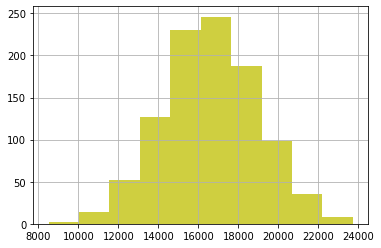

In [18]:
# Figure 3.6
# distribution of the difference in means between master's and doctoral's
d3 = Mean_d - Mean_m
plt.hist(d3, 10, facecolor='y', alpha=0.75)
plt.grid(True)
plt.show()

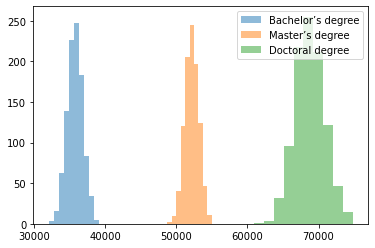

In [19]:
# just for exploration, plot the three boostrap distributions in one graph
plt.hist(Mean_b, 10, alpha=0.5, label='Bachelor’s degree')
plt.hist(Mean_m, 10, alpha=0.5, label='Master’s degree')
plt.hist(Mean_d, 10, alpha=0.5, label='Doctoral degree')
plt.legend(loc='upper right')
# According to the exploration plot of the three groups' salary altogether in one graph, 
# bachelor's and master's salaries are more concentrated and close to the mean
# and doctoral's salary seems to have a larger variation.

#### d) If suitable, perform ANOVA with a 0.05 threshold on the bootstrapped data. Explain your rationale.

In [62]:
stats.f_oneway(Mean_b, Mean_m, Mean_d)

F_onewayResult(statistic=124850.69292946055, pvalue=0.0)

In [68]:
s, p = stats.f_oneway(Mean_b, Mean_m, Mean_d)
p < 0.05

True

In [37]:
# merge the data altogether into one dataframe
d1 = pd.DataFrame({'salary': Mean_b[:], 'education': "b"}) # bachelor
d2 = pd.DataFrame({'salary': Mean_m[:], 'education': "m"}) # master
d3 = pd.DataFrame({'salary': Mean_d[:], 'education': "d"}) # doctoral
df = pd.concat([d1,d2,d3])

#df.head()

# Tukey test
tukey = pairwise_tukeyhsd(endog= df['salary'],
                          groups= df['education'],
                          alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
     b      d   33052.624 0.001  32897.5216  33207.7264   True
     b      m  16458.9092 0.001  16303.8068  16614.0116   True
     d      m -16593.7148 0.001 -16748.8171 -16438.6124   True
--------------------------------------------------------------


There exist significant differences in salaries between the three education levels according to the extremely small p-value (< 0.05) and extremely large statistic. The differences between the three groups bootstrapped data become extremely large, because each data is a mean from a random sample which is very similar to its original mean and far away from the other groups means/bootstrapped data. Based on Tukey's test, the comparisons are all significant, and the largest difference is still between bachelor and doctoral.

#### e) Comment on your findings.

When we compare the original three educations salary sample means, there already existed significant differences. The bootstrapped data makes the three groups' salary concentrated more closely to the original means and far away from the other two groups. 

The three plots of the differences in means indicates the largest difference exists between bachelor's and doctoral ($33000). 

The difference between bachelor's and master's is very similar to the difference between master's and doctoral ($16000).